In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from torchvision.datasets import ImageFolder
import numpy as np


In [ ]:

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Directories
data_dir = '/content/drive/MyDrive/Medicinal_Leaf_dataset'  # Update dataset path
checkpoint_dir = '/content/drive/MyDrive/Model_Checkpoints'  # Directory with saved checkpoints
os.makedirs(checkpoint_dir, exist_ok=True)


In [ ]:
# Parameters
batch_size = 32
num_classes = 80
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Custom ImageFolder class to exclude hidden folders
class CustomImageFolder(ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and not d.name.startswith('.')]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx


In [ ]:
# Load dataset
dataset = CustomImageFolder(root=data_dir, transform=transform)
labels = [label for _, label in dataset.samples]  # Extract labels


In [ ]:
# Initialize model
def initialize_model():
    model = models.resnet50(pretrained=True)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    return model.to(device)


In [ ]:
# Evaluate model
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())

    return true_labels, predicted_labels


In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(cm, class_names, fold):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.show()


In [ ]:
# Perform evaluation for each fold
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_class_reports = []


Evaluating model for fold 1...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]
<ipython-input-14-13726f7b76b4>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is poss

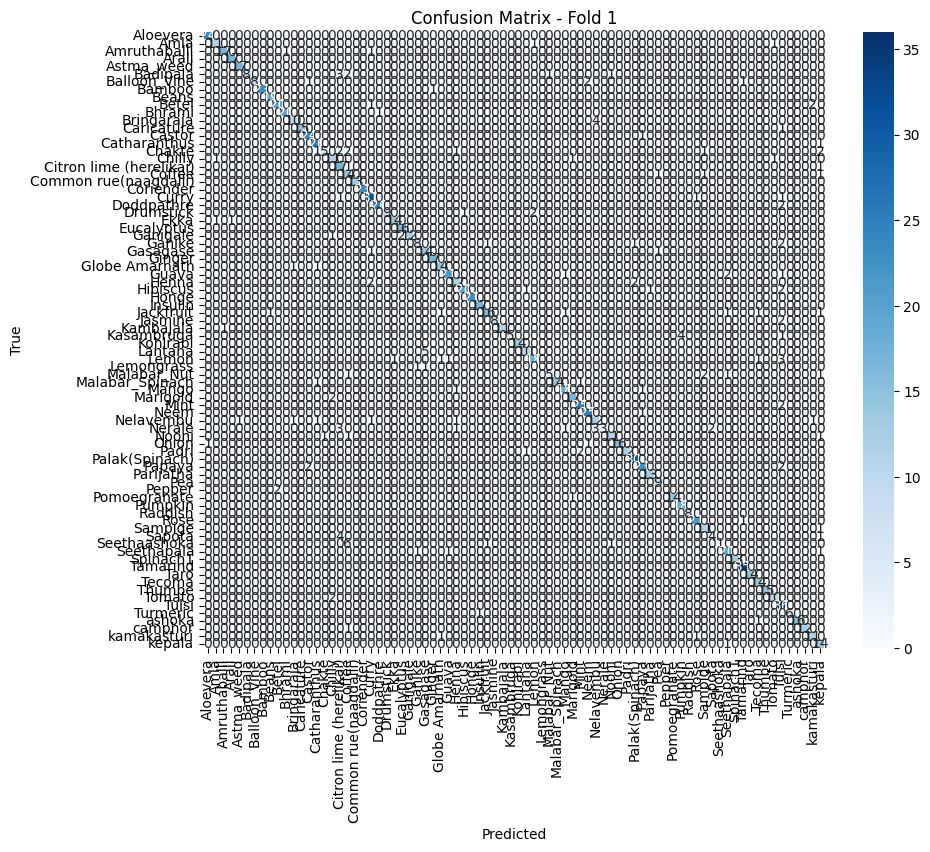

Accuracy for Fold 1: 0.8725
Classification Report:
                          precision    recall  f1-score   support

               Aloevera       0.96      1.00      0.98        24
                   Amla       0.85      0.85      0.85        13
           Amruthaballi       0.94      0.89      0.92        19
                  Arali       0.94      1.00      0.97        17
             Astma_weed       0.94      1.00      0.97        17
               Badipala       1.00      0.53      0.70        15
           Balloon_Vine       1.00      0.67      0.80        12
                 Bamboo       1.00      0.96      0.98        24
                  Beans       0.95      1.00      0.97        19
                  Betel       0.91      0.87      0.89        23
                 Bhrami       0.95      0.95      0.95        21
             Bringaraja       0.83      0.71      0.77        14
             Caricature       1.00      0.94      0.97        16
                 Castor       0.89   

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-14-13726f7b76b4>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

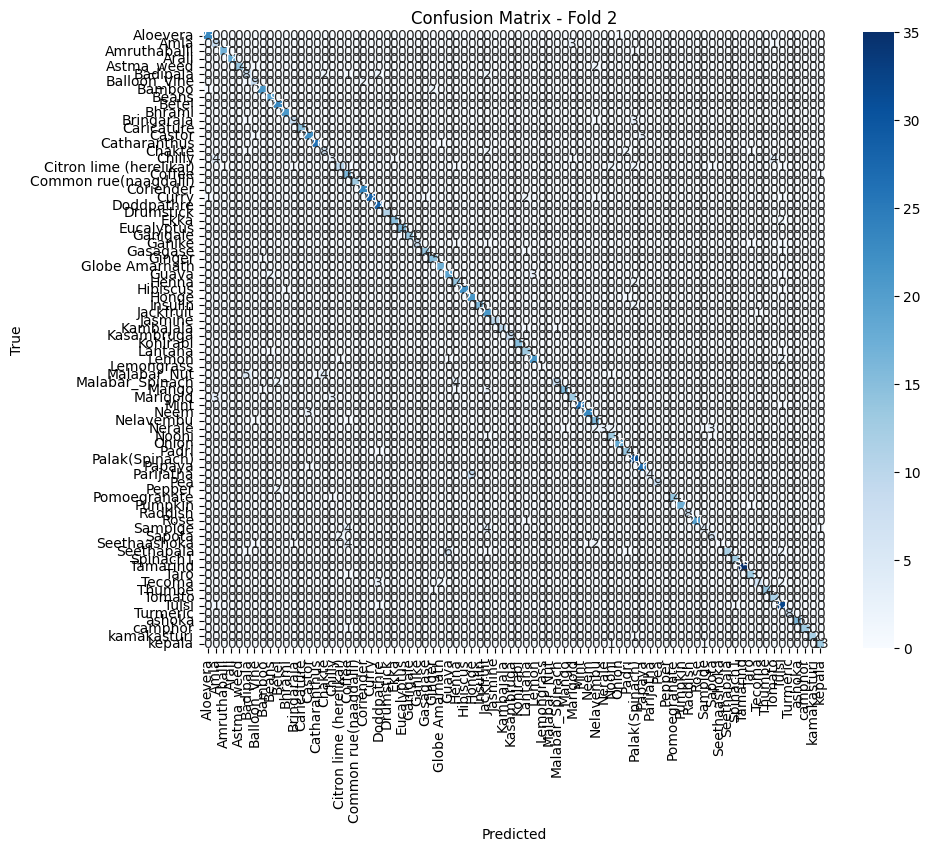

Accuracy for Fold 2: 0.8514
Classification Report:
                          precision    recall  f1-score   support

               Aloevera       0.92      0.96      0.94        24
                   Amla       0.53      0.69      0.60        13
           Amruthaballi       0.94      0.94      0.94        18
                  Arali       1.00      1.00      1.00        18
             Astma_weed       1.00      0.82      0.90        17
               Badipala       0.47      0.53      0.50        15
           Balloon_Vine       0.69      0.75      0.72        12
                 Bamboo       0.91      0.88      0.89        24
                  Beans       0.86      1.00      0.93        19
                  Betel       0.85      1.00      0.92        23
                 Bhrami       0.95      1.00      0.98        21
             Bringaraja       0.82      0.64      0.72        14
             Caricature       1.00      1.00      1.00        15
                 Castor       0.85   

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-14-13726f7b76b4>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

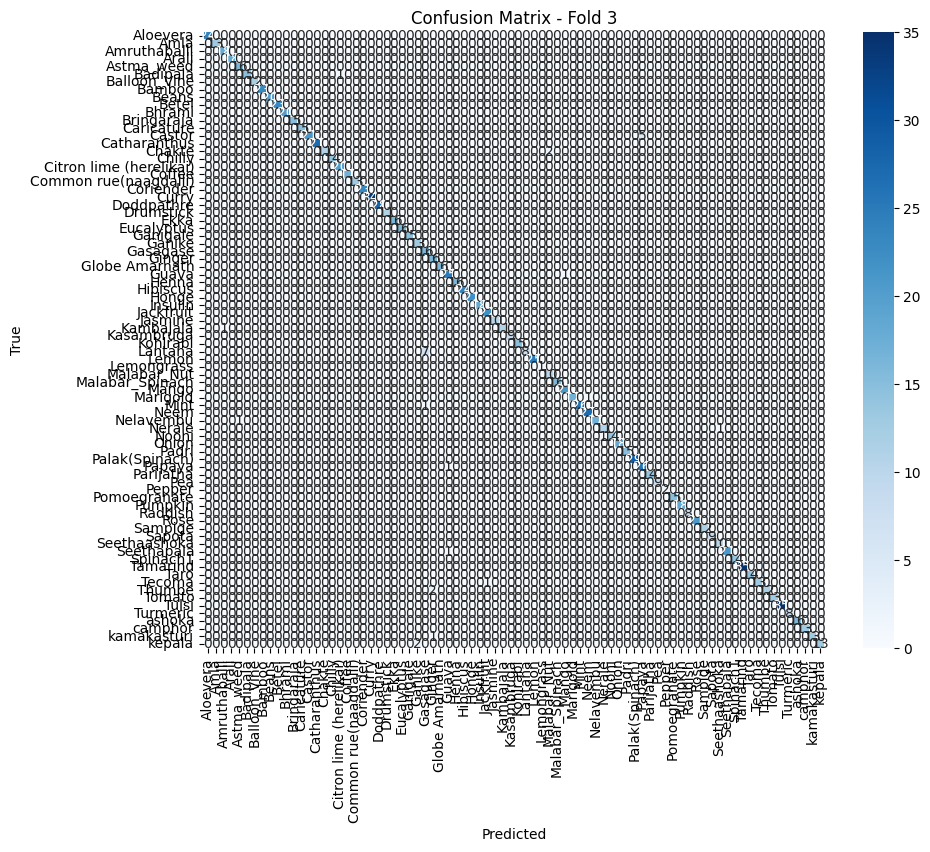

Accuracy for Fold 3: 0.9783
Classification Report:
                          precision    recall  f1-score   support

               Aloevera       1.00      1.00      1.00        24
                   Amla       1.00      1.00      1.00        13
           Amruthaballi       0.95      1.00      0.97        18
                  Arali       1.00      1.00      1.00        18
             Astma_weed       0.94      1.00      0.97        16
               Badipala       1.00      0.94      0.97        16
           Balloon_Vine       1.00      1.00      1.00        12
                 Bamboo       1.00      1.00      1.00        23
                  Beans       1.00      1.00      1.00        20
                  Betel       1.00      1.00      1.00        23
                 Bhrami       1.00      1.00      1.00        20
             Bringaraja       1.00      1.00      1.00        15
             Caricature       1.00      1.00      1.00        15
                 Castor       1.00   

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-14-13726f7b76b4>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

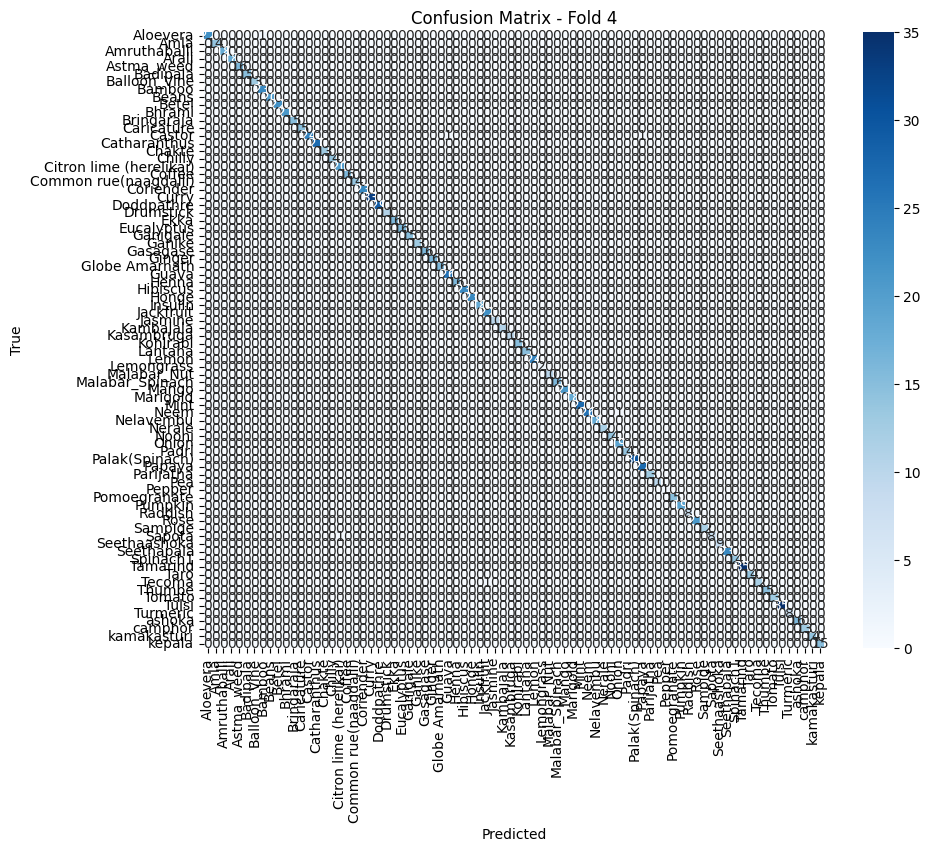

Accuracy for Fold 4: 0.9957
Classification Report:
                          precision    recall  f1-score   support

               Aloevera       1.00      0.96      0.98        23
                   Amla       1.00      1.00      1.00        14
           Amruthaballi       1.00      1.00      1.00        18
                  Arali       1.00      1.00      1.00        18
             Astma_weed       1.00      1.00      1.00        16
               Badipala       1.00      1.00      1.00        15
           Balloon_Vine       1.00      1.00      1.00        13
                 Bamboo       0.96      1.00      0.98        23
                  Beans       1.00      1.00      1.00        20
                  Betel       1.00      1.00      1.00        22
                 Bhrami       1.00      1.00      1.00        21
             Bringaraja       1.00      1.00      1.00        15
             Caricature       1.00      1.00      1.00        15
                 Castor       1.00   

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-14-13726f7b76b4>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

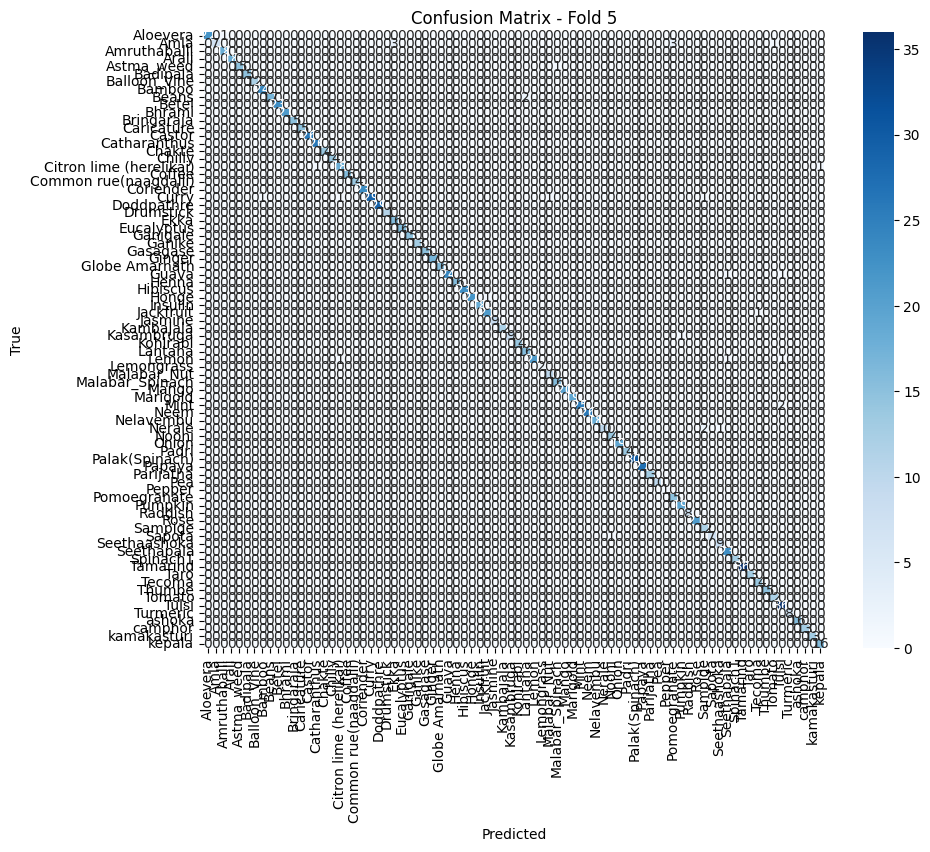

Accuracy for Fold 5: 0.9768
Classification Report:
                          precision    recall  f1-score   support

               Aloevera       1.00      0.96      0.98        23
                   Amla       1.00      0.50      0.67        14
           Amruthaballi       0.95      1.00      0.97        18
                  Arali       1.00      1.00      1.00        18
             Astma_weed       1.00      0.94      0.97        16
               Badipala       1.00      1.00      1.00        15
           Balloon_Vine       1.00      1.00      1.00        12
                 Bamboo       0.96      1.00      0.98        24
                  Beans       1.00      0.89      0.94        19
                  Betel       1.00      1.00      1.00        23
                 Bhrami       1.00      1.00      1.00        21
             Bringaraja       1.00      1.00      1.00        15
             Caricature       1.00      1.00      1.00        15
                 Castor       1.00   

In [ ]:

for fold, (train_idx, val_idx) in enumerate(skf.split(dataset.samples, labels)):
    checkpoint_path = os.path.join(checkpoint_dir, f"fold_{fold + 1}_best_model_epoch_1.pth")
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint for fold {fold + 1} not found. Skipping.")
        continue

    print(f"Evaluating model for fold {fold + 1}...")

    # Load model
    model = initialize_model()  # Reinitialize model
    model.load_state_dict(torch.load(checkpoint_path, map_location=device))
    model = model.to(device)

    # Create validation DataLoader for this fold
    val_dataset = Subset(dataset, val_idx)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Evaluate model
    true_labels, predicted_labels = evaluate_model(model, val_loader)

    # Calculate metrics
    acc = accuracy_score(true_labels, predicted_labels)
    fold_accuracies.append(acc)

    class_report = classification_report(true_labels, predicted_labels, target_names=dataset.classes, zero_division=0)
    fold_class_reports.append(class_report)

    cm = confusion_matrix(true_labels, predicted_labels)
    plot_confusion_matrix(cm, dataset.classes, fold)

    print(f"Accuracy for Fold {fold + 1}: {acc:.4f}")
    print("Classification Report:\n", class_report)

# Print average accuracy across folds
avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"Average Accuracy across all folds: {avg_accuracy:.4f}")


In [ ]:
import matplotlib.pyplot as plt


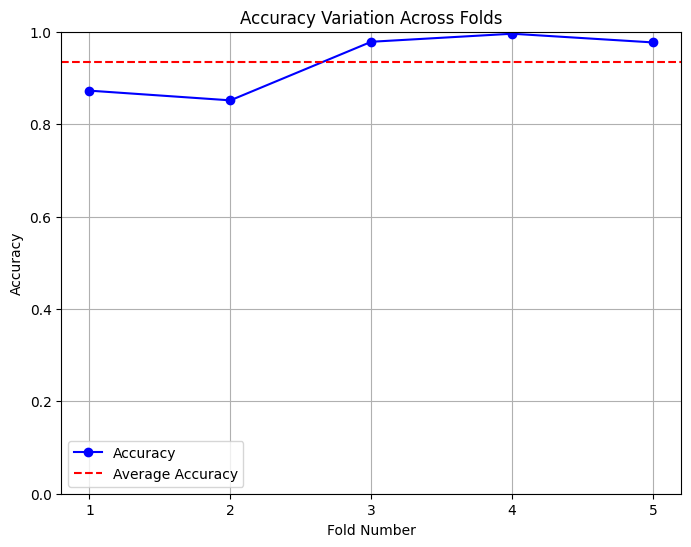

In [ ]:

# Assuming `fold_accuracies` contains accuracy values for each fold
fold_numbers = list(range(1, len(fold_accuracies) + 1))

plt.figure(figsize=(8, 6))
plt.plot(fold_numbers, fold_accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.axhline(y=np.mean(fold_accuracies), color='r', linestyle='--', label='Average Accuracy')

plt.title("Accuracy Variation Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(fold_numbers)  # Ensure x-axis shows fold numbers
plt.ylim(0, 1)  # Accuracy is a fraction, so range is [0, 1]
plt.legend()
plt.grid()
plt.show()
